In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from time import time

In [2]:
def hist_camMan():
    camMan = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
    hist,bins = np.histogram(camMan,256,[0,256])
    c_hist=np.cumsum(hist)
    fig = plt.figure(frameon=False,figsize=(10.24,5.12),dpi=100)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.bar(bins[:-1], c_hist/(600000/16000), color='grey') #600000 (600000/1600)
    plt.bar(bins[:-1], hist, color='black') #1600
    plt.title('Histogram Normal and cumlative')
    fig.savefig("histograms/cammanHis.png")
    plt.show()

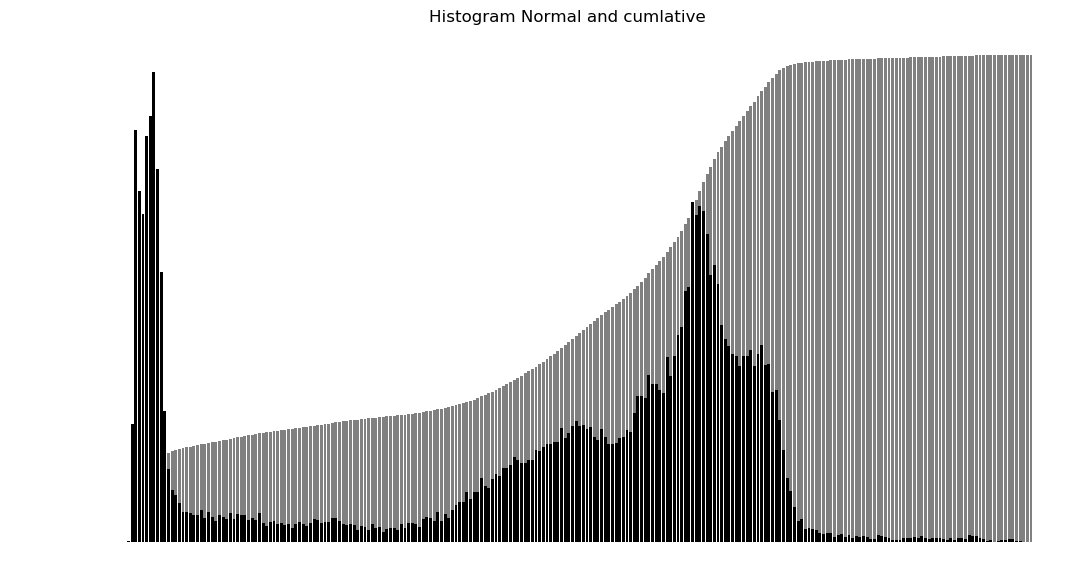

In [3]:
hist_camMan()

In [4]:
def hist_batMan():
    batMan = cv2.imread('images/bat.png', cv2.IMREAD_GRAYSCALE)
    hist,bins = np.histogram(batMan,256,[0,256])
    c_hist=np.cumsum(hist)
    fig = plt.figure(frameon=False,figsize=(10.24,5.12),dpi=100)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.bar(bins[:-1], c_hist/(600000/35000), color='grey') #600000
    plt.bar(bins[:-1], hist, color='black') #35000
    plt.title('Histogram Normal and cumlative')
    fig.savefig("histograms/batHis.png")
    plt.show()

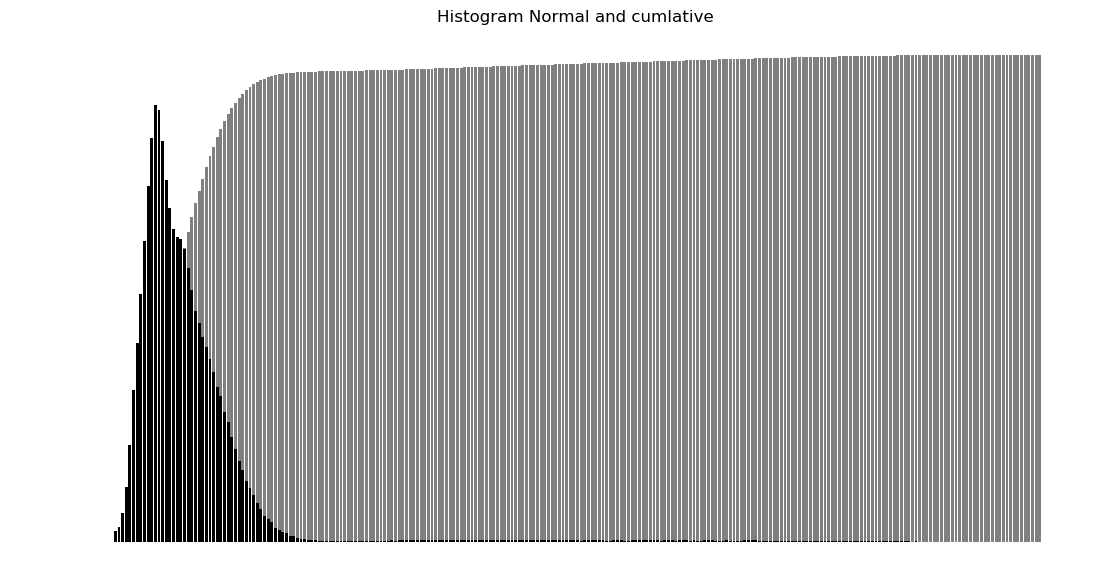

In [5]:
hist_batMan()

In [6]:
def hist_fog():
    fog = cv2.imread('images/fog.png', cv2.IMREAD_GRAYSCALE)
    hist,bins = np.histogram(fog,256,[0,256])
    c_hist=np.cumsum(hist)
    fig = plt.figure(frameon=False,figsize=(10.24,5.12),dpi=100)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.bar(bins[:-1], c_hist/(1200000/40000), color='grey') 
    plt.bar(bins[:-1], hist, color='black') 
    plt.title('Histogram Normal and cumlative')   
    fig.savefig("histograms/fogHis.png")
    plt.show()

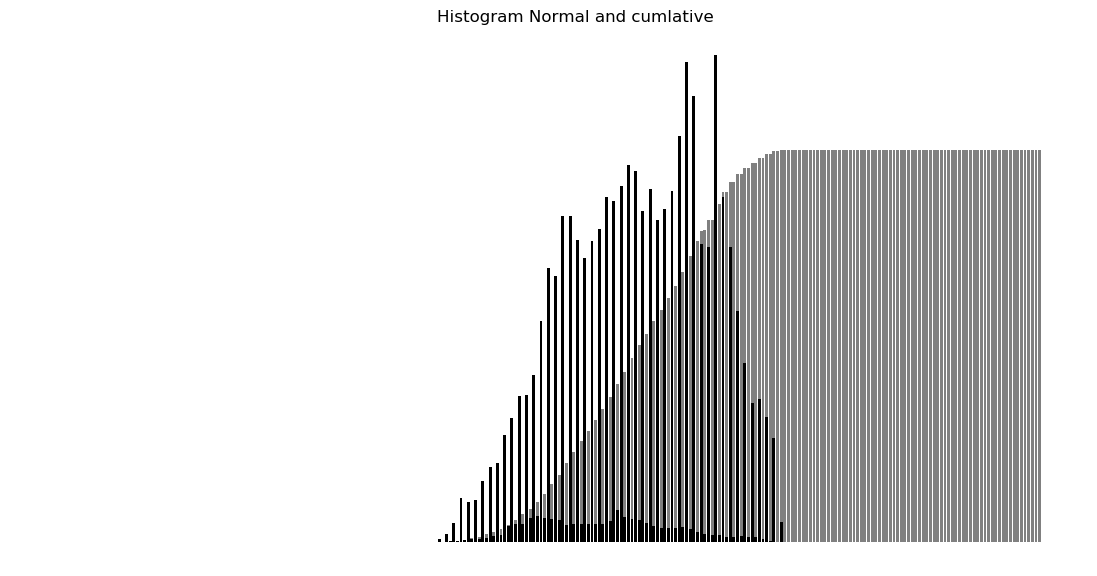

In [8]:
hist_fog()

In [9]:
def hist_fogNoise():
    fogNoise = cv2.imread('images/fognoise.png', cv2.IMREAD_GRAYSCALE)
    hist,bins = np.histogram(fogNoise,256,[0,256])
    c_hist=np.cumsum(hist)
    fig = plt.figure(frameon=False,figsize=(10.24,5.12),dpi=100)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.bar(bins[:-1], c_hist/(1200000/40000),color="grey")
    plt.bar(bins[:-1], hist,color="black")
    plt.title('Histogram Normal and cumlative')
    fig.savefig("histograms/fognoiseHis.png")
    plt.show()

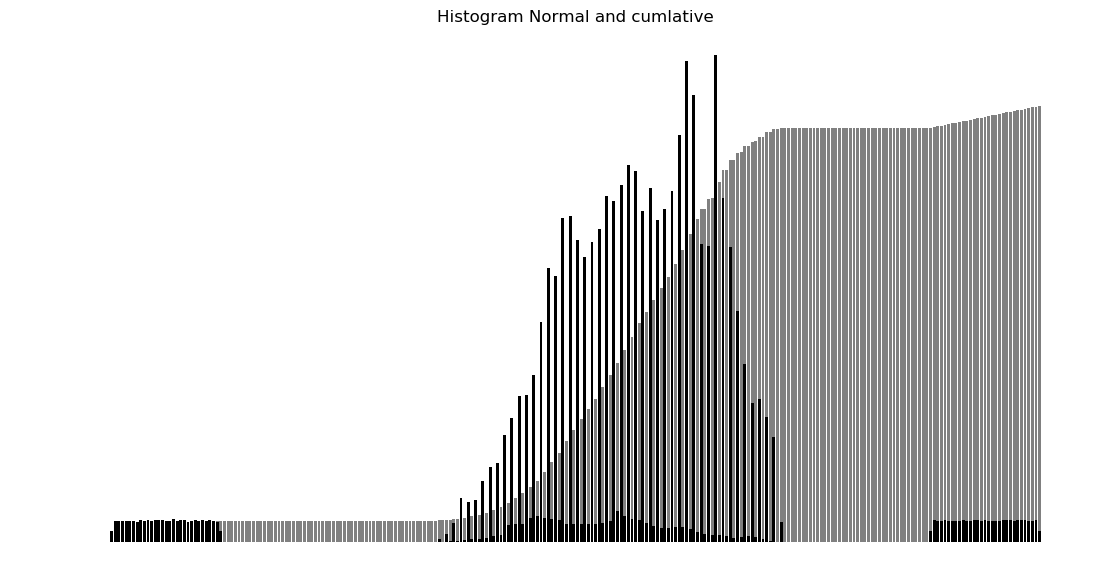

In [10]:
hist_fogNoise()

In [11]:
def meanVSgauss():
    img = cv2.imread('images/cameraman.png')
    mean=cv2.blur(img,(5,5))
    gauss=cv2.GaussianBlur(img,(5,5),0)
    
    hist_mean,bins = np.histogram(mean,256,[0,256])
    hist_gauss,bins = np.histogram(gauss,256,[0,256])


    f, axarr = plt.subplots(2,2,figsize=(20,10))
    axarr[0][0].imshow(mean)
    axarr[0][1].bar(bins[:-1], hist_mean,color="black")
    axarr[1][0].imshow(gauss)
    axarr[1][1].bar(bins[:-1], hist_gauss,color="black")


    plt.show()

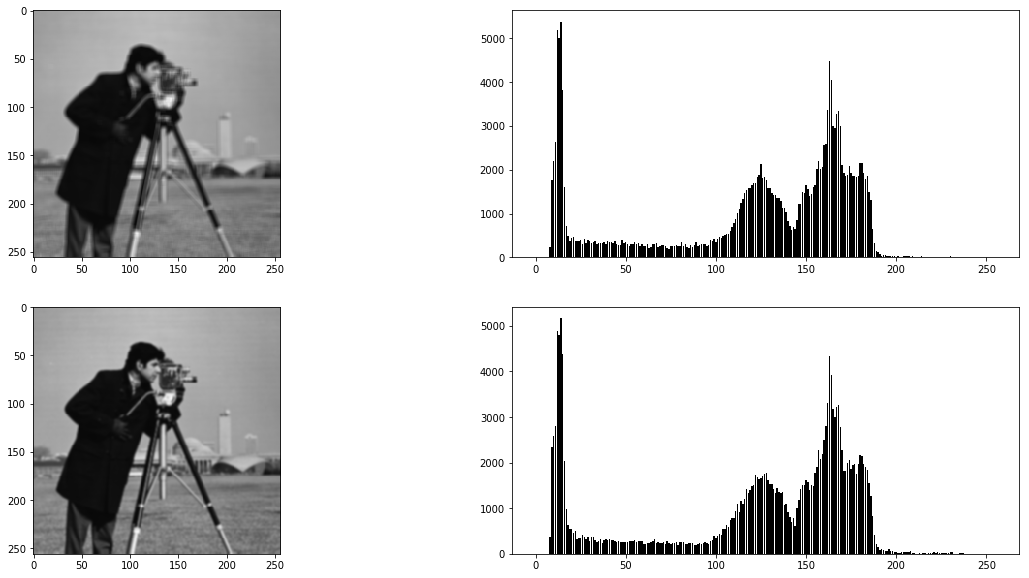

In [12]:
meanVSgauss()

In [26]:
def median_filter_5(cond): 
    img = cv2.imread('images/fognoise.png',cv2.IMREAD_GRAYSCALE)
    img=np.array(img)
    count_c=0
    count=0
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            p=img[i][j]
            up=i-2
            down=i+2
            left=j-2
            right=j+2
            if(up<0):
                up=i
            if(left<0):
                left=j
            if(down>=img.shape[0]):
                down=img.shape[0]-1
            if(right>=img.shape[1]):
                right=img.shape[1]-1
            if(cond):           
                if((p>=0 and p<=30)or (p>=220 and p<=256)):
                    #img[up:down+1,left:right+1]=cv2.medianBlur(img[up:down+1,left:right+1],5)
                    sort_p=np.sort(img[up:down+1,left:right+1].flatten())
                    idx=(len(sort_p)/2)+1 if len(sort_p)%2==0 else (len(sort_p))/2
                    img[i][j]=sort_p[int(idx)]
                    count_c+=1
            else:
                sort_p=np.sort(img[up:down+1,left:right+1].flatten())
                idx=(len(sort_p)/2)+1 if len(sort_p)%2==0 else (len(sort_p))/2
                img[i][j]=sort_p[int(idx)]
                count+=1
            

    return img

In [27]:
def p(pixel,maxv,minv):    
    return ((pixel-minv)/(maxv-minv))*255

In [28]:
def selective_median_filtering():
    t0 = time()
    img=median_filter_5(False)
    print (" Pre-enhancement Running Time:", round(time()-t0, 3), "s")

    #after-enhancement
    #pixels visired 122746
    t0 = time()
    img_cond=median_filter_5(True)
    print ("Post-enhancement Running Time:", round(time()-t0, 3), "s")
    f, axarr = plt.subplots(1,3,figsize=(20,10))

    axarr[0].imshow(cv2.imread('images/fognoise.png',cv2.IMREAD_GRAYSCALE),cmap='gray')
    axarr[1].imshow(img,cmap='gray')
    axarr[2].imshow(img_cond,cmap='gray')


    plt.show()


    """
    Pre-enhancement Running Time: 21.891 s
    Post-enhancement Running Time: 12.023 s
    """

 Pre-enhancement Running Time: 6.928 s
Post-enhancement Running Time: 6.877 s


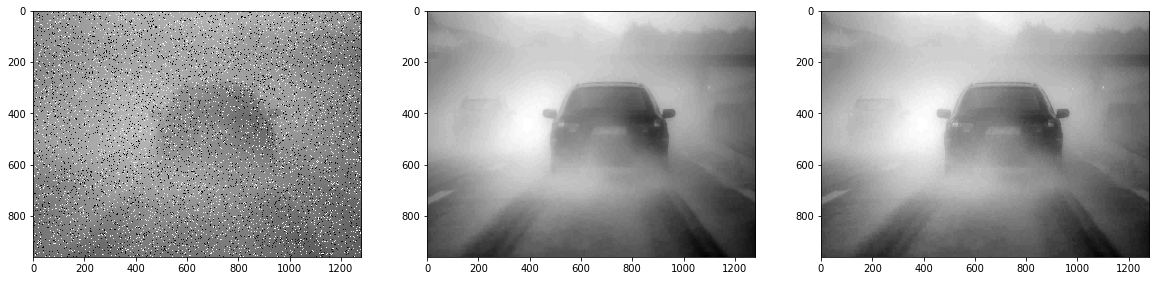

In [30]:
selective_median_filtering()

In [17]:
def median_histogram():
    img = cv2.imread('images/fognoise.png',cv2.IMREAD_GRAYSCALE)
    median = cv2.medianBlur(img,5)
    f, axarr = plt.subplots(1,4,figsize=(20,10))
    hist,bins = np.histogram(img,256,[0,256])
    hist_m,bins = np.histogram(median,256,[0,256])
    axarr[0].imshow(img,cmap='gray')
    axarr[1].bar(bins[:-1], hist,color="black")
    axarr[2].imshow(median,cmap='gray')
    axarr[3].bar(bins[:-1], hist_m,color="black")
    plt.show()

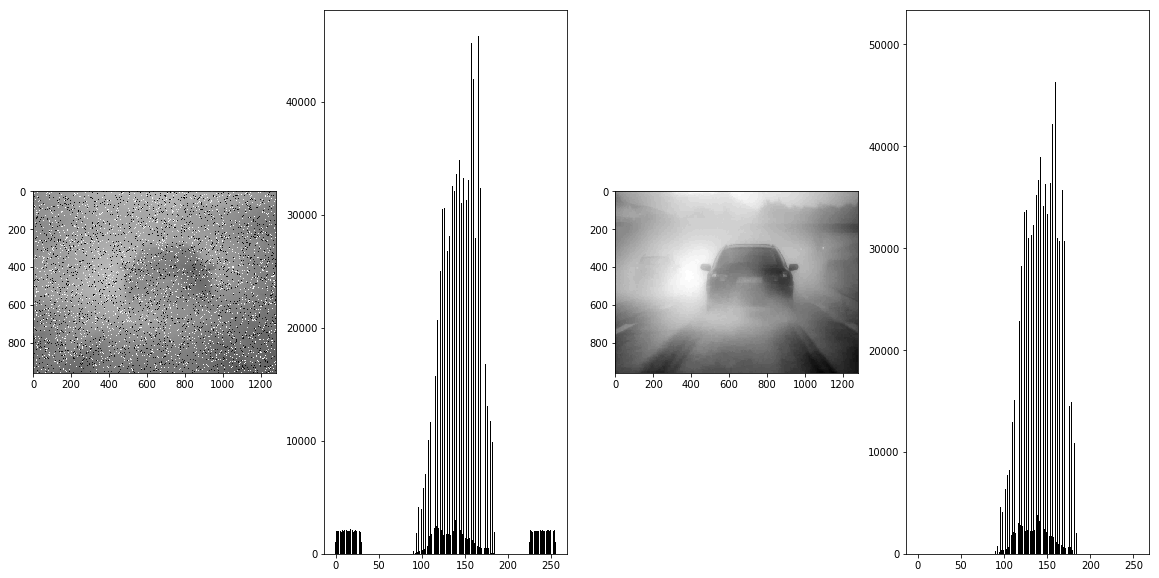

In [18]:
median_histogram()

In [31]:
def contrast_equalization():
  
  img = cv2.imread('images/frostfog.png',cv2.IMREAD_GRAYSCALE)
  #equlaiztion
  equ = cv2.equalizeHist(img)
  #contrast stretching
  img=np.array(img)
  max_v=img.max()
  min_v=img.min()
  f=np.vectorize(p)
  contrast=f(img,max_v,min_v)
  
  hist,bins = np.histogram(img,256,[0,256])
  hist_eq,bins = np.histogram(equ,256,[0,256])
  hist_contrast,bins = np.histogram(contrast,256,[0,256])

  f, axarr = plt.subplots(2,3,figsize=(20,10))
  axarr[0][0].imshow(img,cmap='gray')
  axarr[1][0].bar(bins[:-1], hist,color="black")
  axarr[0][1].imshow(equ,cmap='gray')
  axarr[1][1].bar(bins[:-1], hist_eq,color="black")
  axarr[0][2].imshow(contrast,cmap='gray')
  axarr[1][2].bar(bins[:-1], hist_contrast,color="black")
    
    
  plt.show()
  

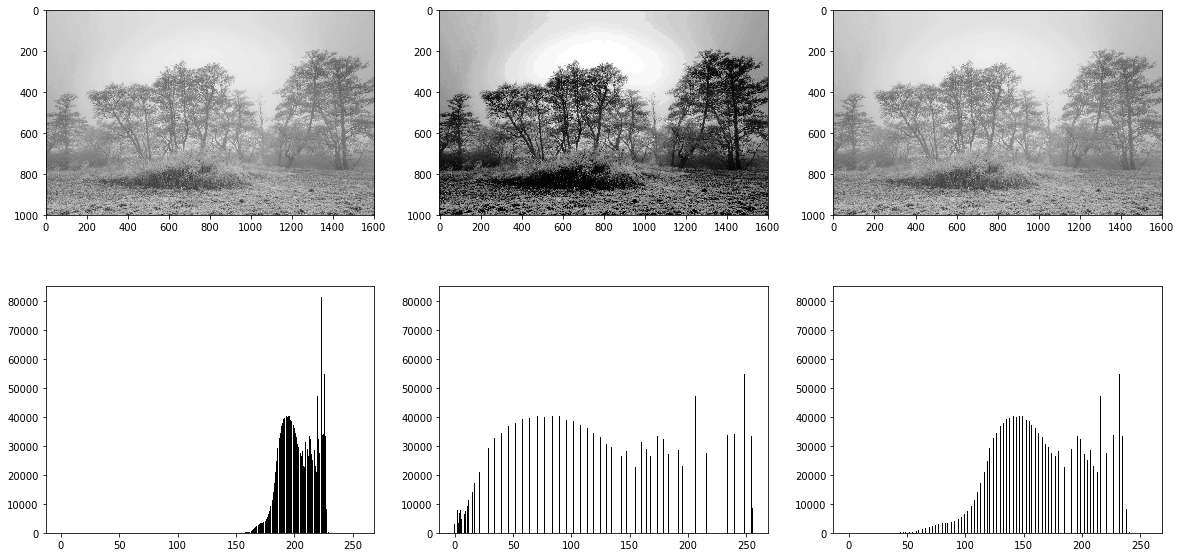

In [32]:
contrast_equalization()

In [34]:
def diff_img():
 img_original = cv2.imread("images/treeM.png",cv2.IMREAD_GRAYSCALE) 
 img = cv2.imread("images/tree.png",cv2.IMREAD_GRAYSCALE) 
 mystery=img_original-img
 plt.imshow(mystery,cmap="gray")
 plt.show()

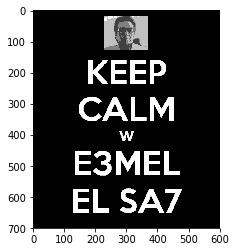

In [35]:
diff_img()